# Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

**W** – ***Win***: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)

**R** – ***Runs scored***: number of times a player crosses home plate

**AB** – ***At bat***: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

**H** – ***Hit***: reaching base because of a batted, fair ball without error by the defense

**2B** – ***Double***: hits on which the batter reaches second base safely without the contribution of a fielding error

**3B** – ***Triple***: hits on which the batter reaches third base safely without the contribution of a fielding error

**HR** – ***Home runs***: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

**BB** – ***Base on balls (also called a "walk")***: hitter not swinging at four pitches called out of the strike zone and awarded first base

**K (or SO)** – ***Strikeout***: number of batters who received strike three

**SB** – ***Stolen base***: number of bases advanced by the runner while the ball is in the possession of the defense

**RA** – ***Run average***: number of runs allowed times nine divided by innings pitched

**ER** – ***Earned run***: number of runs that did not occur as a result of errors or passed balls

**ERA** – ***Earned run average***: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

**CG** – ***Complete game***: number of games where player was the only pitcher for their team

**SHO** – ***Shutout***: number of complete games pitched with no runs allowed

**SV** – ***Save***: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

**E** – ***Errors***: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

In [2]:
baseball = pd.read_csv("baseball.csv")
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
baseball.shape

(30, 17)

There are 30 rows and 17 columns

In [4]:
baseball.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

look like there are no constant or identifier column

In [5]:
baseball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

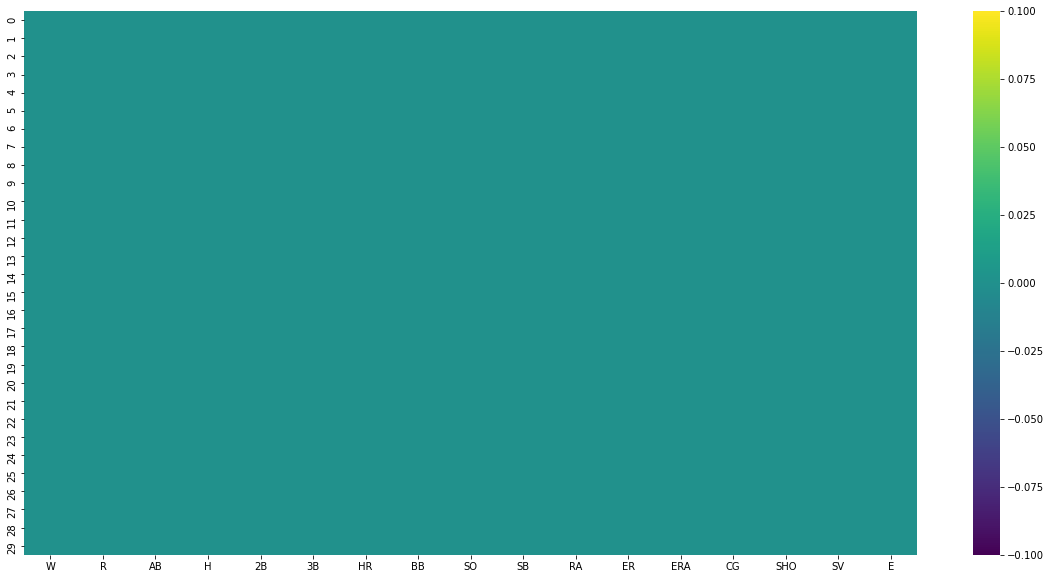

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(baseball.isnull(),yticklabels=True,cbar=True,cmap='viridis')
plt.show()

There are no missing values.

In [8]:
baseball.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

there are no columns with object dtype

In [9]:
baseball.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

data is not that much skewed 

In [10]:
baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


All the columns have count equal to 30. Mean and median have negligible difference stating that data has very less skewness present.

There is high variance in all the columns except for ERA column

Minimum 63
Maximum 100


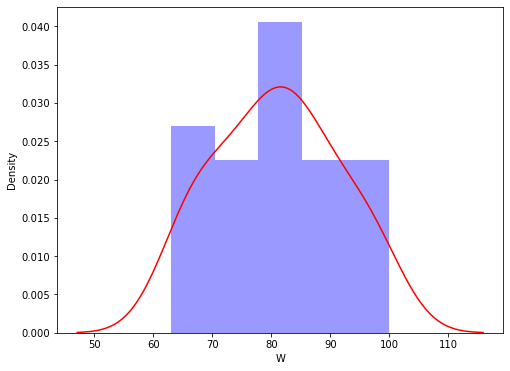

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(baseball['W'],color='b', kde_kws={"color": "r"})

# printing min and max value for W
print('Minimum',baseball['W'].min())
print('Maximum',baseball['W'].max())

Negligible skewness is present in W,  ranging from 63 to 100

Minimum 573
Maximum 891


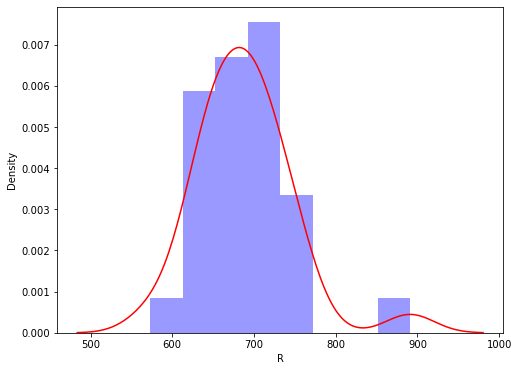

In [21]:
plt.figure(figsize=(8,6))
sns.distplot(baseball['R'],color='b', kde_kws={"color": "r"})

# printing min and max value for W
print('Minimum',baseball['R'].min())
print('Maximum',baseball['R'].max())

Number of times player crosses home plate to score run is ranged between 573 to 891 Maximum. data shoes very little skewness.

Minimum 5385
Maximum 5649


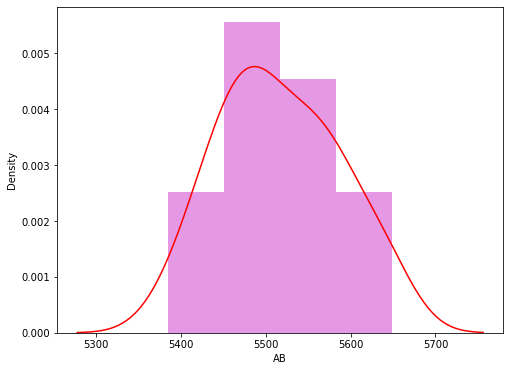

In [22]:
plt.figure(figsize=(8,6))
sns.distplot(baseball['AB'],color='m', kde_kws={"color": "r"})

print('Minimum',baseball['AB'].min())
print('Maximum',baseball['AB'].max())


Being hit At bat by the player in a season is in a range of Minimum 5385 to Maximum 5649, data shoes little skewness.

Minimum 1324
Maximum 1515


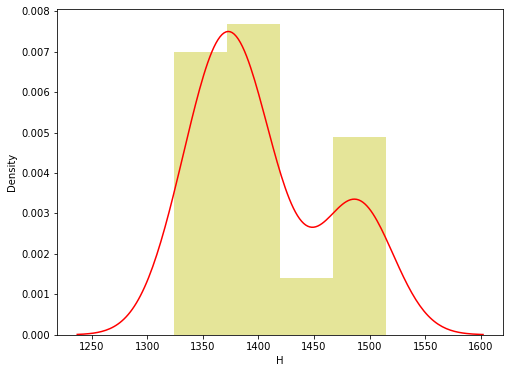

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(baseball['H'],color='y', kde_kws={"color": "r"})

print('Minimum',baseball['H'].min())
print('Maximum',baseball['H'].max())

No of hit received by player in a season, data shoes little skewness.

Minimum 236
Maximum 308


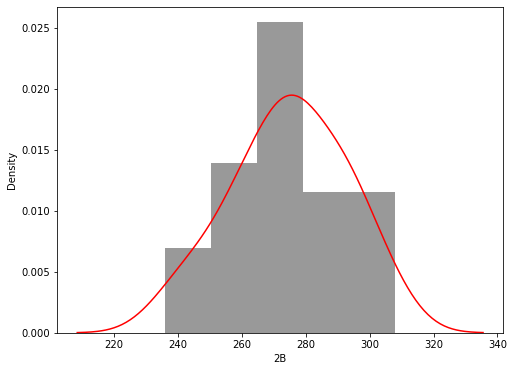

In [24]:
plt.figure(figsize=(8,6))
sns.distplot(baseball['2B'],color='k', kde_kws={"color": "r"})

print('Minimum',baseball['2B'].min())
print('Maximum',baseball['2B'].max())

No of hits on which the batter reaches second base is ranged from 236 to 308, data shoes little skewness.

Minimum 13
Maximum 49


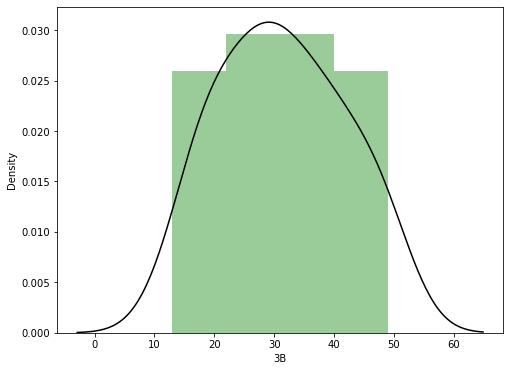

In [25]:
plt.figure(figsize=(8,6))
sns.distplot(baseball['3B'],color='g', kde_kws={"color": "k"})

print('Minimum',baseball['3B'].min())
print('Maximum',baseball['3B'].max())

No of hits on which the batter reaches third base is ranged from 13 to 49, data shoes little skewness.

Minimum 100
Maximum 232


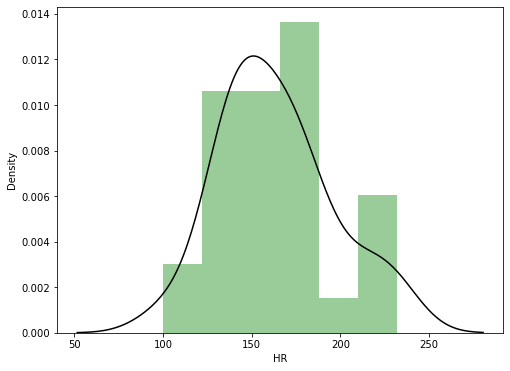

In [27]:
plt.figure(figsize=(8,6))
sns.distplot(baseball['HR'],color='g', kde_kws={"color": "k"})

print('Minimum',baseball['HR'].min())
print('Maximum',baseball['HR'].max())

No of hits on which the batter reaches all four base is ranged from 100 to 232, data shoes little skewness.

Minimum 375
Maximum 570


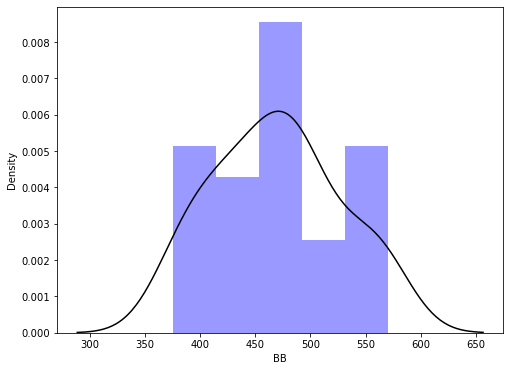

In [29]:
plt.figure(figsize=(8,6))
sns.distplot(baseball['BB'],color='b', kde_kws={"color": "k"})

print('Minimum',baseball['BB'].min())
print('Maximum',baseball['BB'].max())

No of hits on which the called out of the strike zone and to first base is ranged from 100 to 232, data shoes little skewness.

Minimum 973
Maximum 1518


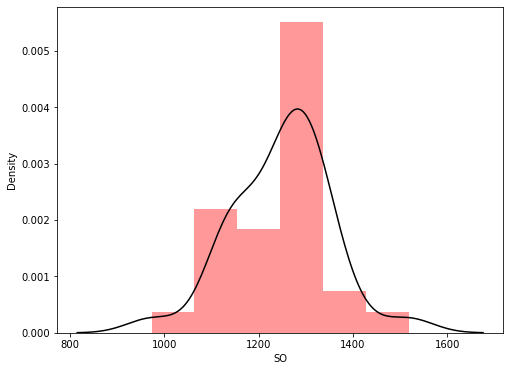

In [30]:
plt.figure(figsize=(8,6))
sns.distplot(baseball['SO'],color='r', kde_kws={"color": "k"})

print('Minimum',baseball['SO'].min())
print('Maximum',baseball['SO'].max())

Number of batters who received strike three is ranged from 973 to 1518

Minimum 44
Maximum 134


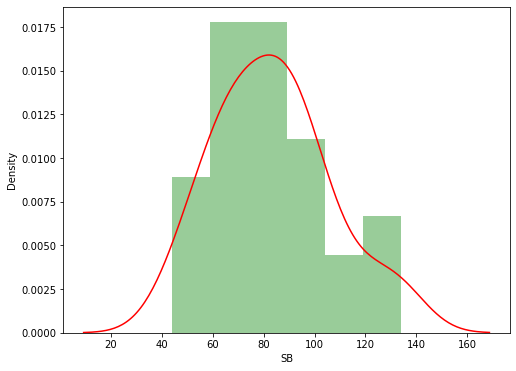

In [31]:
plt.figure(figsize=(8,6))
sns.distplot(baseball['SB'],color='g', kde_kws={"color": "r"})

print('Minimum',baseball['SB'].min())
print('Maximum',baseball['SB'].max())

There are 44 to 134 times bases advanced by the runner while the ball is in the possession of the defense

Minimum 525
Maximum 844


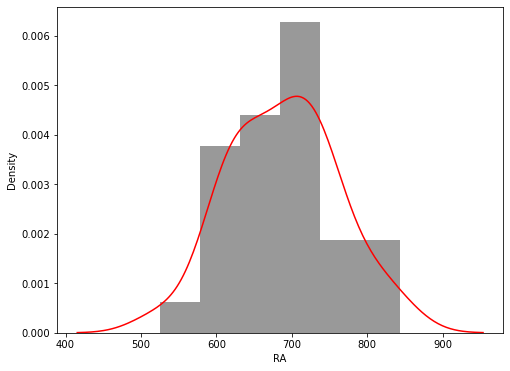

In [32]:
plt.figure(figsize=(8,6))
sns.distplot(baseball['RA'],color='k', kde_kws={"color": "r"})

print('Minimum',baseball['RA'].min())
print('Maximum',baseball['RA'].max())

Average run scored in the range of 525 to 844, data shows little skewness.

Minimum 2.94
Maximum 5.04


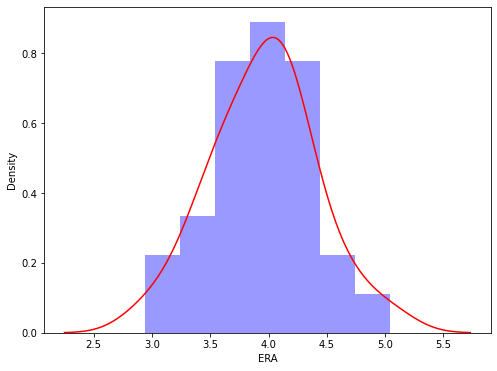

In [33]:
plt.figure(figsize=(8,6))
sns.distplot(baseball['ERA'],color='b', kde_kws={"color": "r"})

print('Minimum',baseball['ERA'].min())
print('Maximum',baseball['ERA'].max())

Average run earned in a season is ranged 2.94 to 5.04, data shows very little skewness.

Minimum 4
Maximum 21


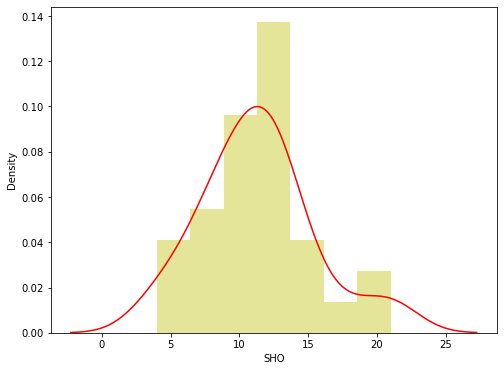

In [35]:
plt.figure(figsize=(8,6))
sns.distplot(baseball['SHO'],color='y', kde_kws={"color": "r"})

print('Minimum',baseball['SHO'].min())
print('Maximum',baseball['SHO'].max())

Minimum 28
Maximum 62


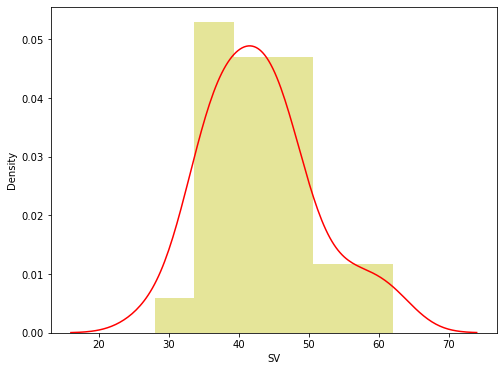

In [36]:
plt.figure(figsize=(8,6))
sns.distplot(baseball['SV'],color='y', kde_kws={"color": "r"})

print('Minimum',baseball['SV'].min())
print('Maximum',baseball['SV'].max())

Minimum 75
Maximum 126


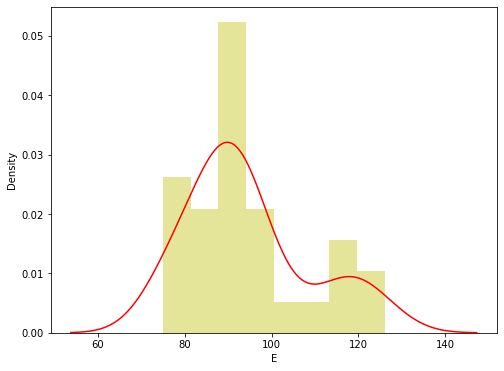

In [37]:
plt.figure(figsize=(8,6))
sns.distplot(baseball['E'],color='y', kde_kws={"color": "r"})

print('Minimum',baseball['E'].min())
print('Maximum',baseball['E'].max())

number of times a fielder fails to make a play is ranged from 75 to 126, data shows very little skewness.

array([[<AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'H'}>],
       [<AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'BB'}>],
       [<AxesSubplot:title={'center':'SO'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'RA'}>,
        <AxesSubplot:title={'center':'ER'}>],
       [<AxesSubplot:title={'center':'ERA'}>,
        <AxesSubplot:title={'center':'CG'}>,
        <AxesSubplot:title={'center':'SHO'}>,
        <AxesSubplot:title={'center':'SV'}>],
       [<AxesSubplot:title={'center':'E'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

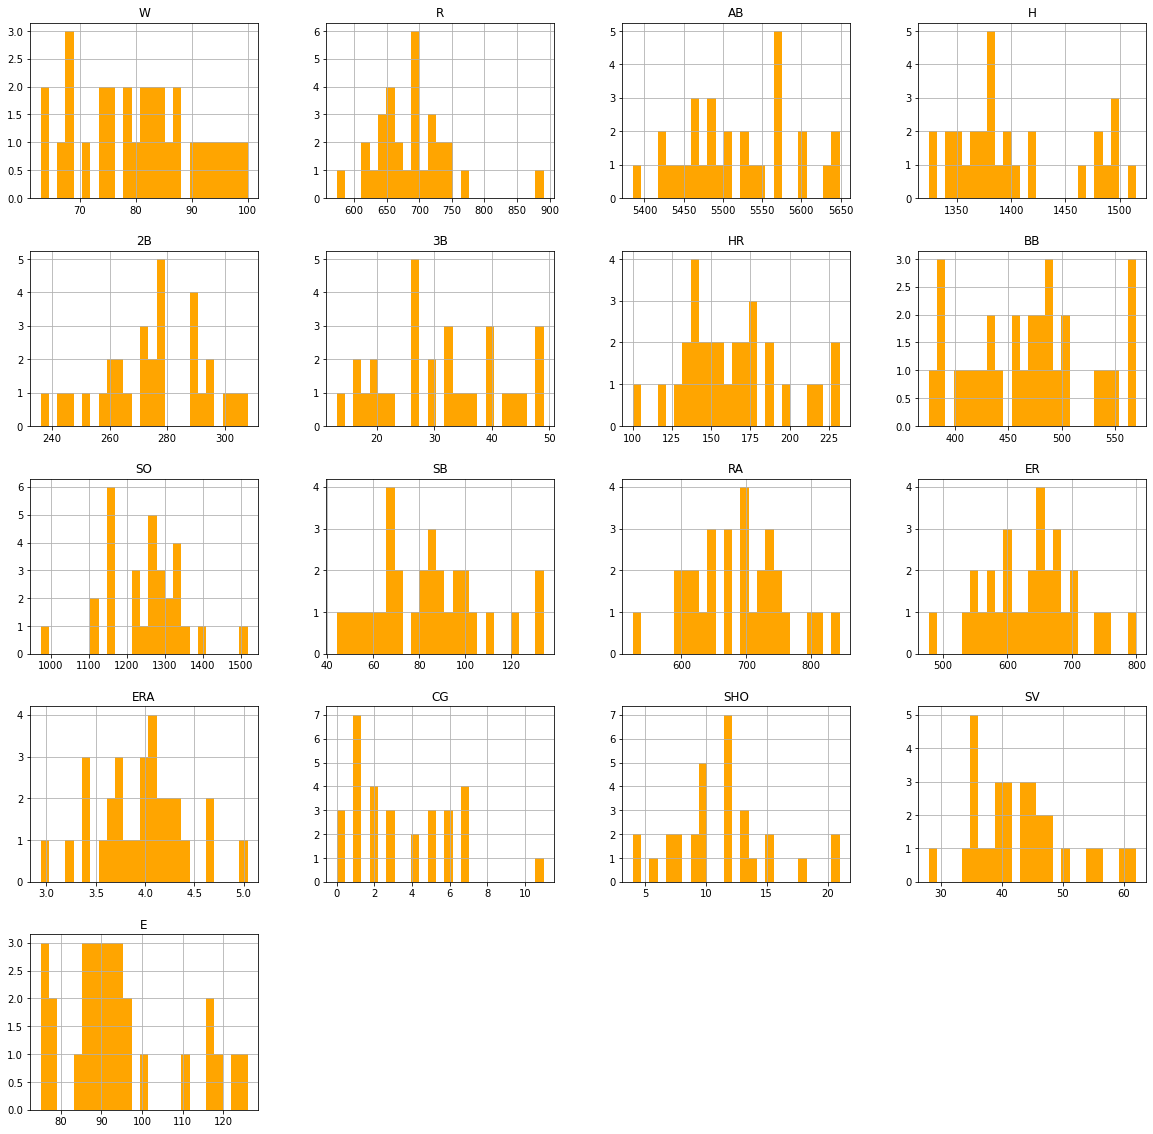

In [40]:
baseball.hist(bins=25,figsize=(20,20),color='orange')

As specified on the data above data show very little skewness except few columns.

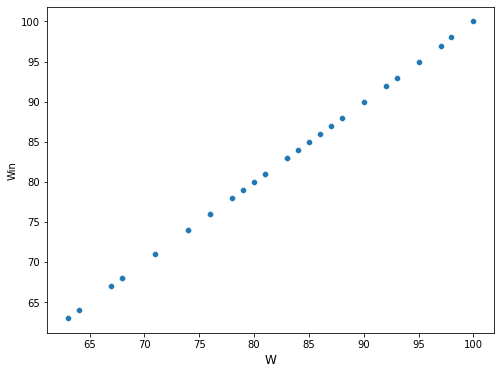

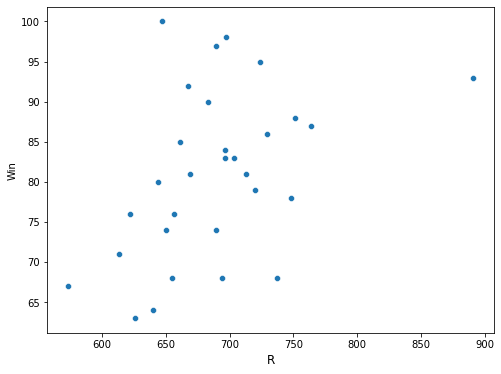

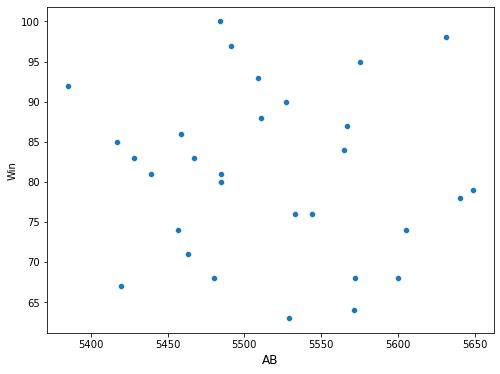

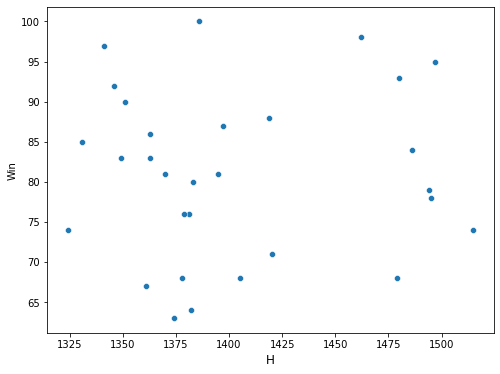

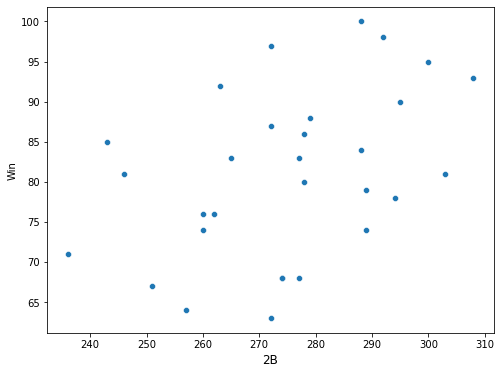

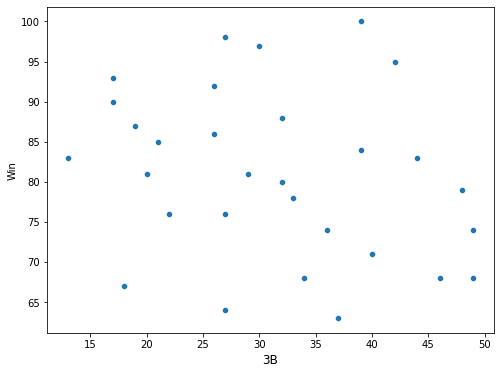

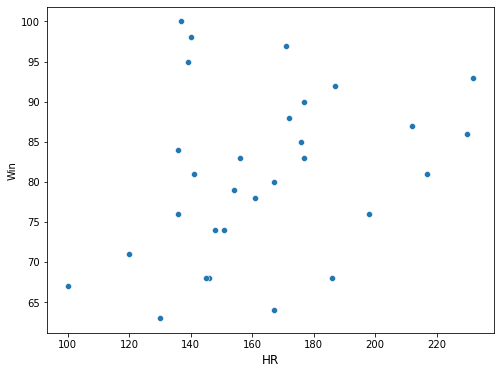

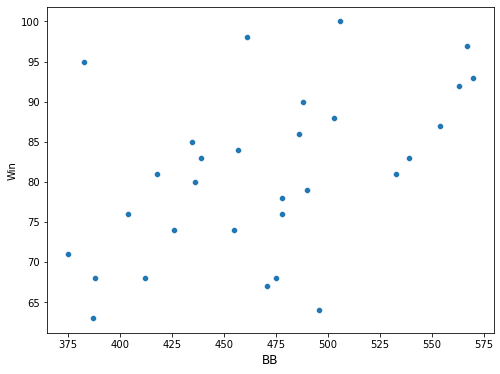

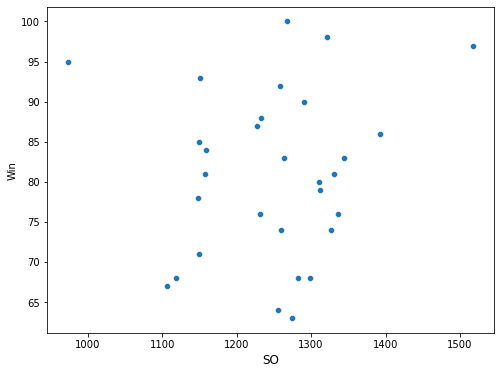

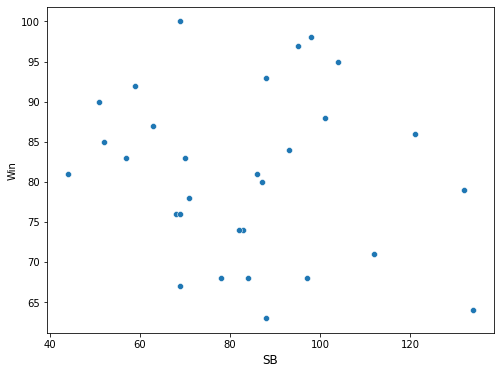

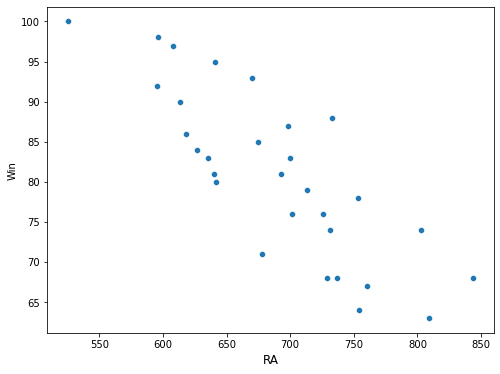

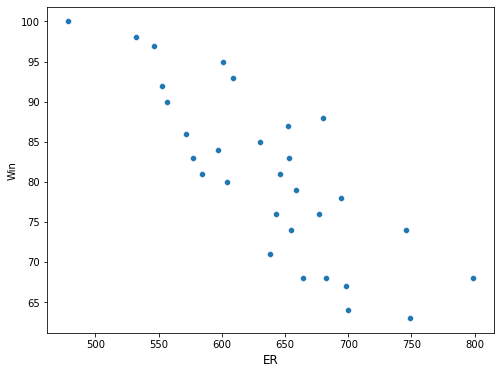

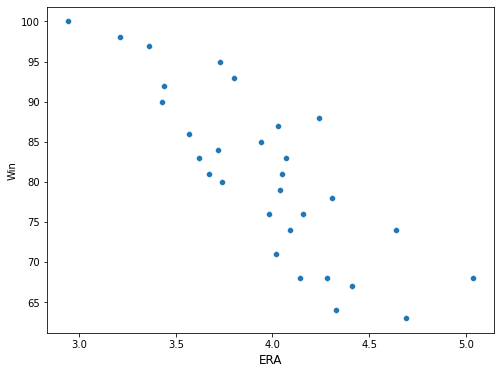

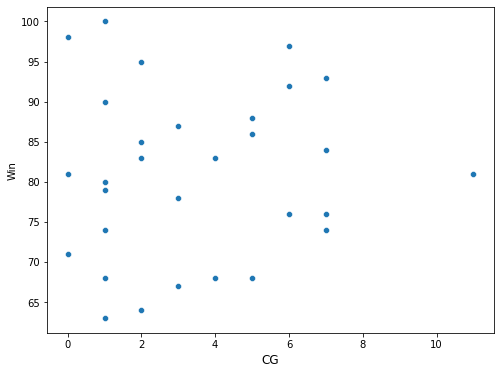

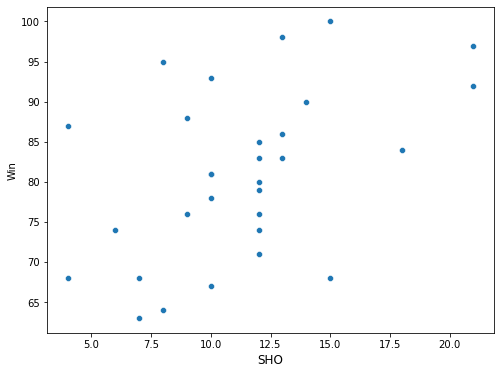

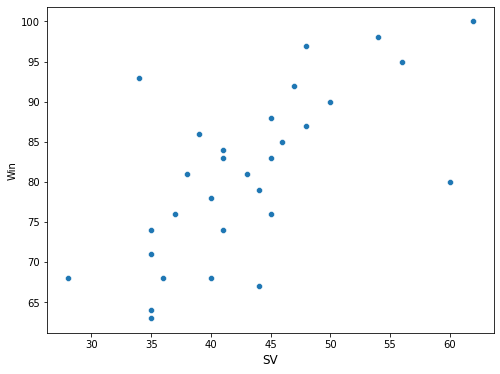

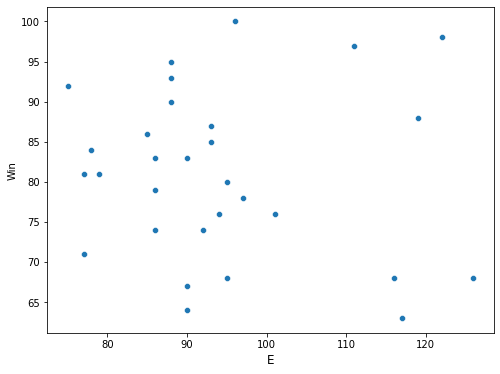

In [44]:
#First let's see the scatter plot of all the Numerical variables in term of W
for i in baseball.columns:
    plt.figure(figsize =(8,6))
    sns.scatterplot(data = baseball, x = i, y = baseball['W']);
    plt.xlabel(i, fontsize = 12)
    plt.ylabel("Win")

* Run scored is directly effecting win, the more the run scored greater the chances of winning
* 2B, 3B, HR is directly proportional to win
* Run average, ER, ERA is somewhat liner graph with inverse win chances, the more average run the less the chances of win.
* Error from fielder specified the win percent of the game.

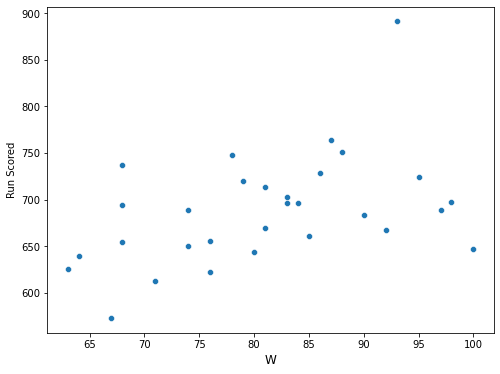

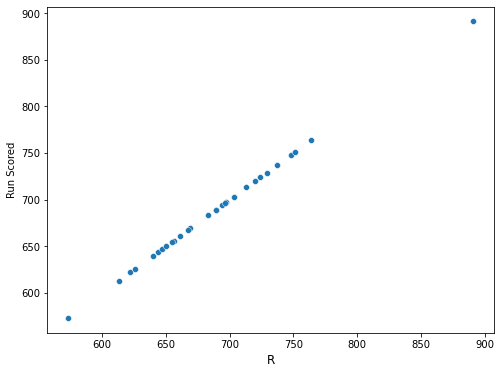

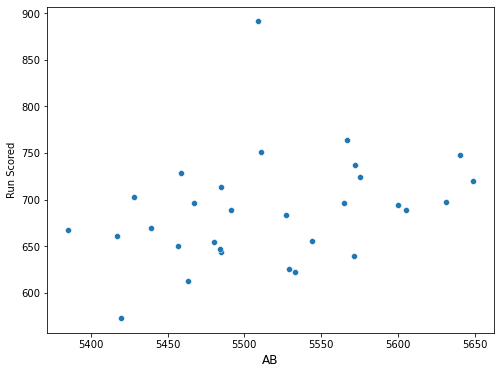

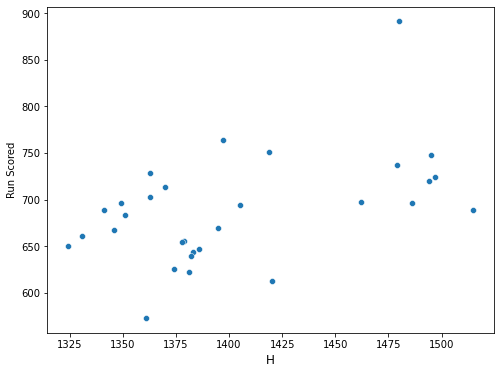

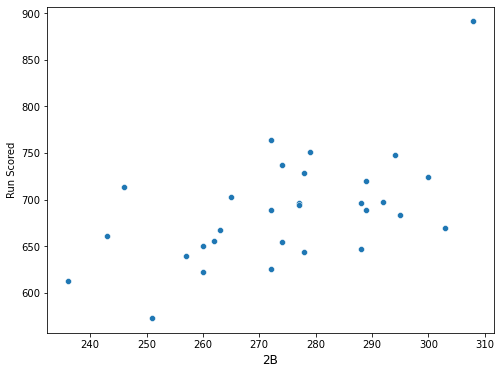

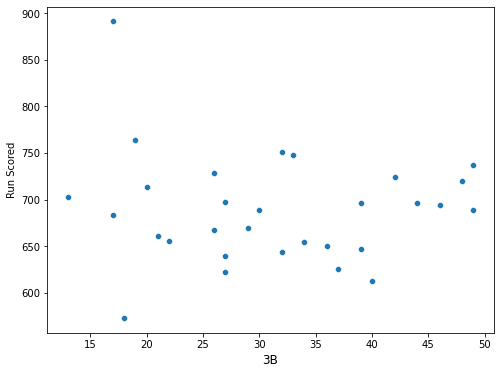

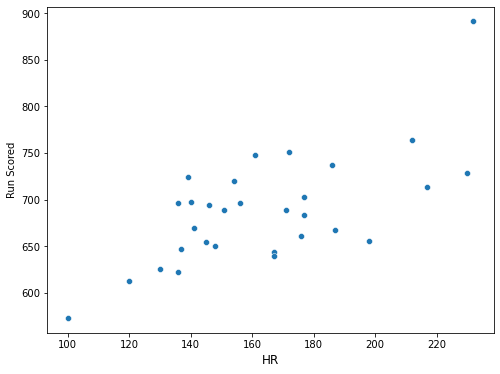

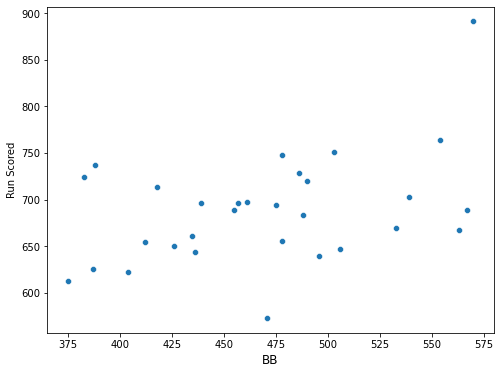

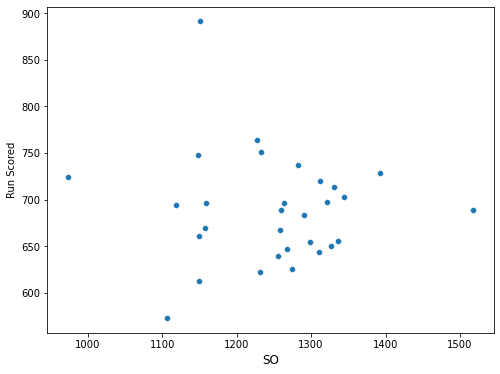

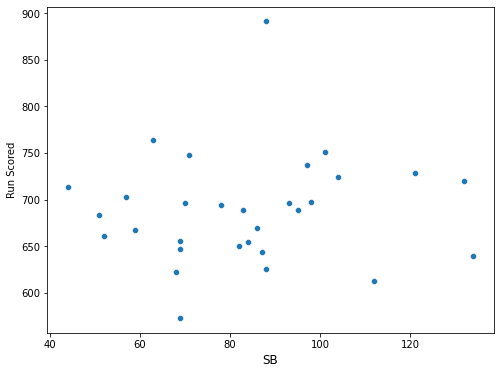

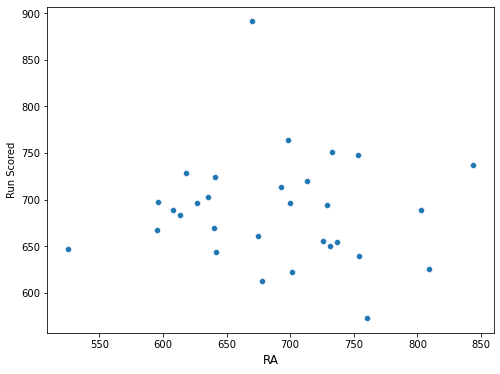

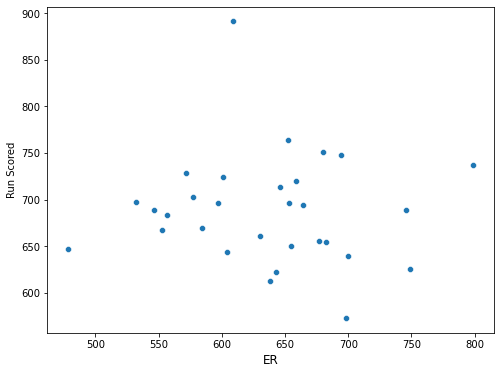

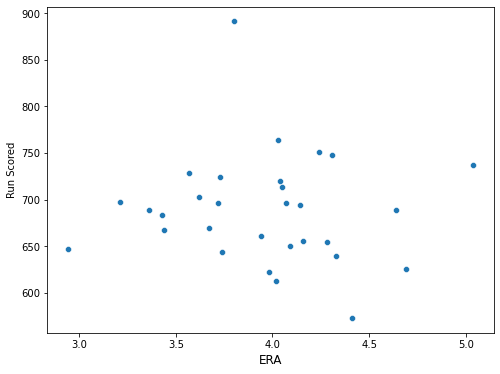

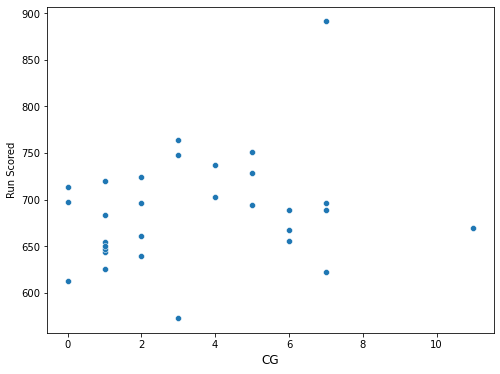

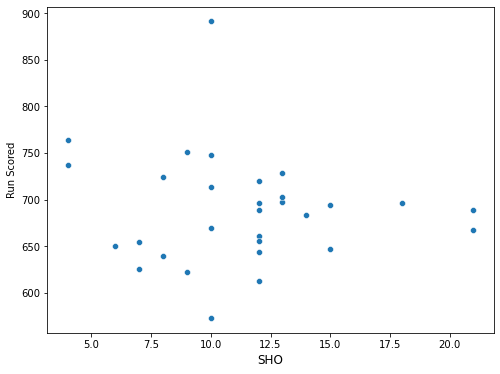

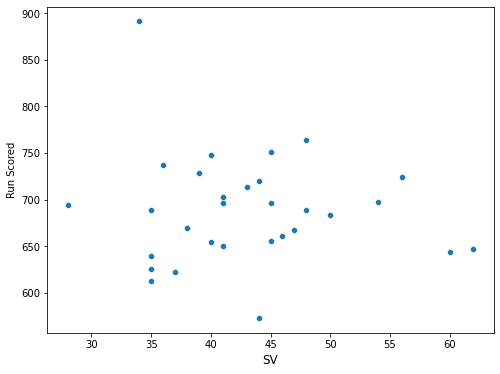

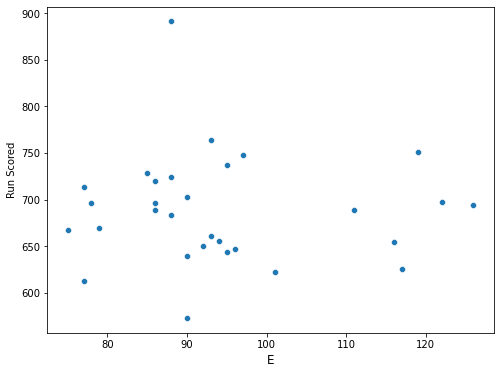

In [45]:
#let's see the scatter plot of all the Numerical variables in term of R
for i in baseball.columns:
    plt.figure(figsize =(8,6))
    sns.scatterplot(data = baseball, x = i, y = baseball['R']);
    plt.xlabel(i, fontsize = 12)
    plt.ylabel("Run Scored")

With the increase in total Run Scorred, all columns 2B,3B,HR, W increases. This is logical as if the more the run scored the greater the changes of win.

In [46]:
baseball.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

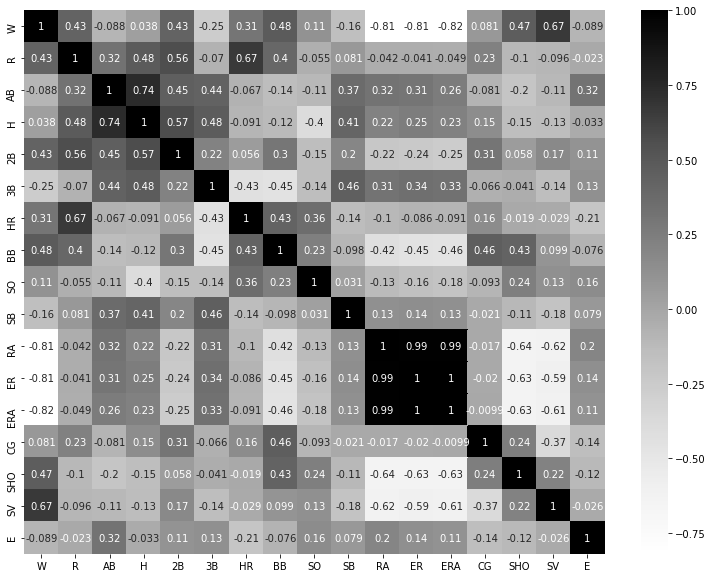

In [47]:
plt.figure(figsize=(13,10))
sns.heatmap(baseball.corr(),annot=True,cmap='Greys')

* RA, ER and ERA have very less correlation with respect to win chances.
* RA, ER and ERA have very high correlated with each other

# Pre-processing

There are no categorical columns no so no need for encoding

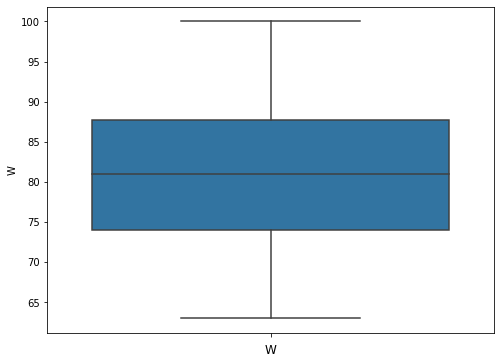

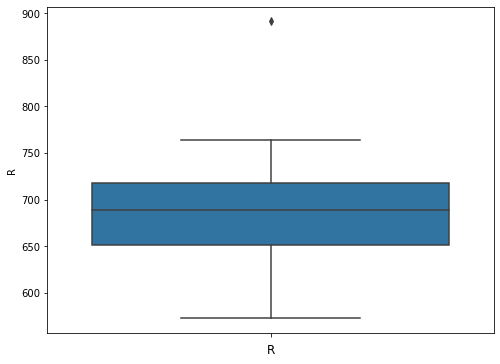

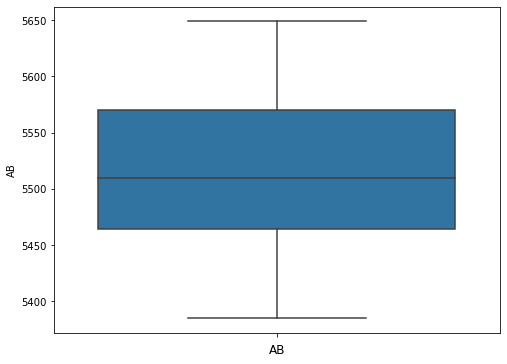

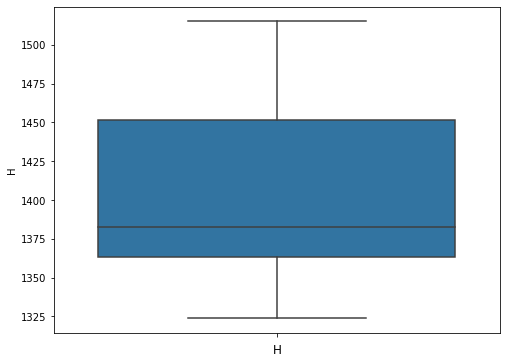

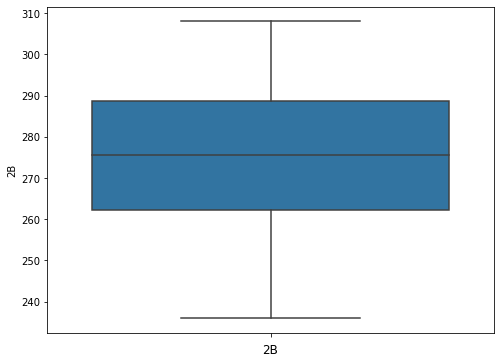

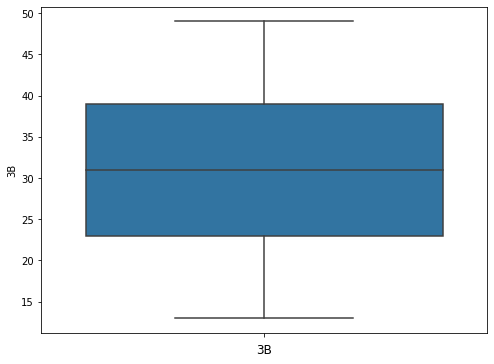

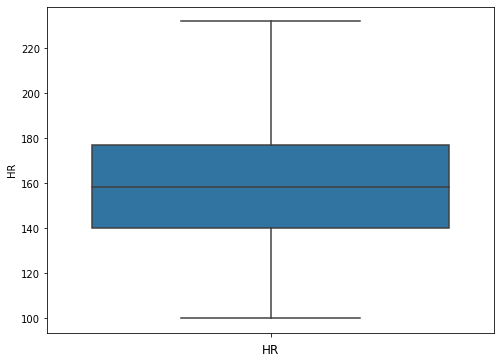

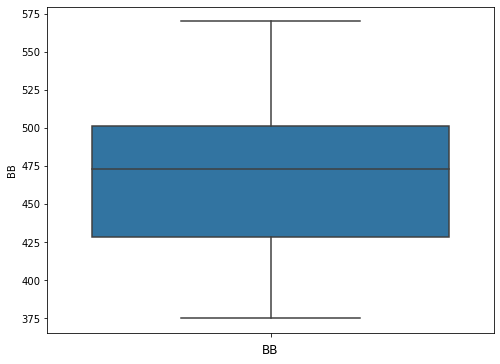

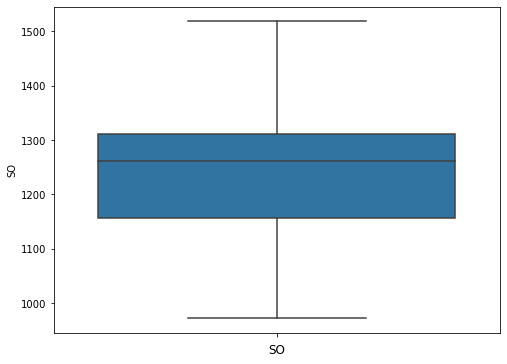

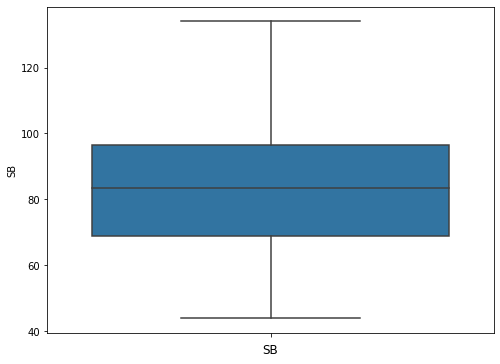

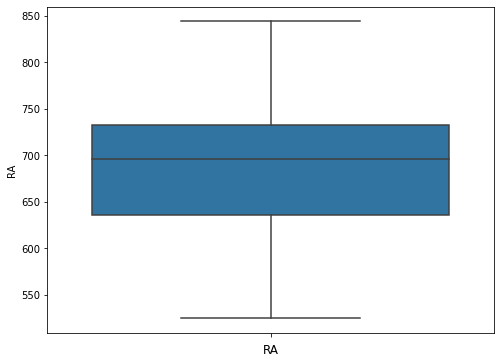

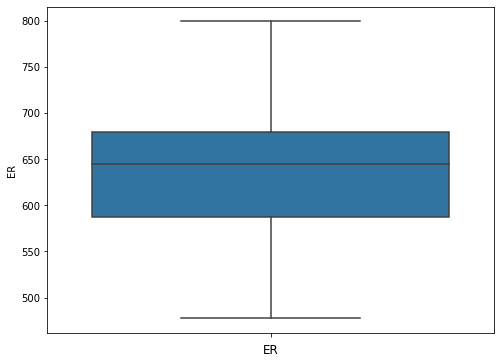

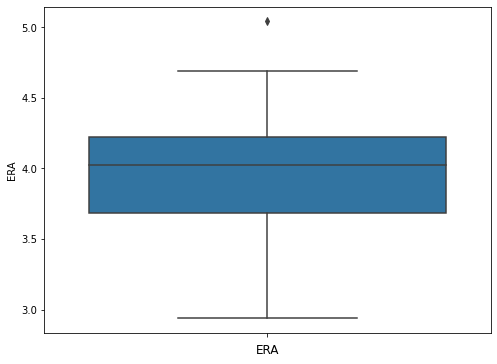

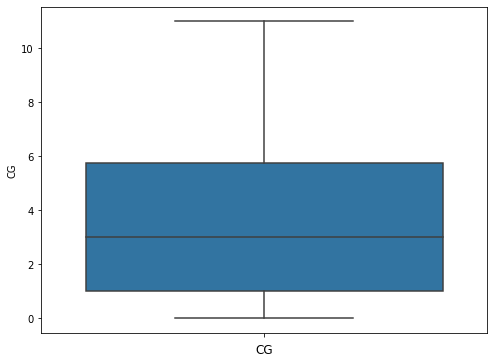

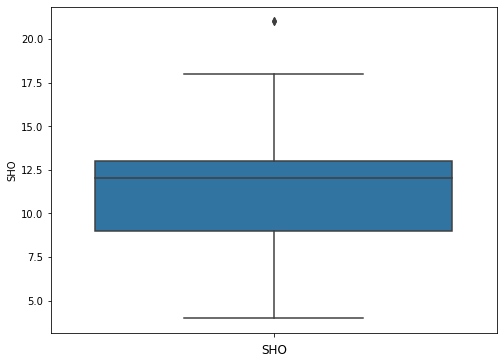

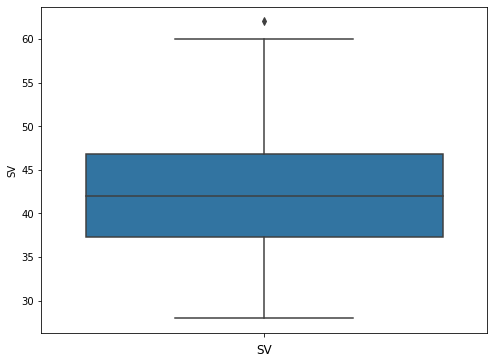

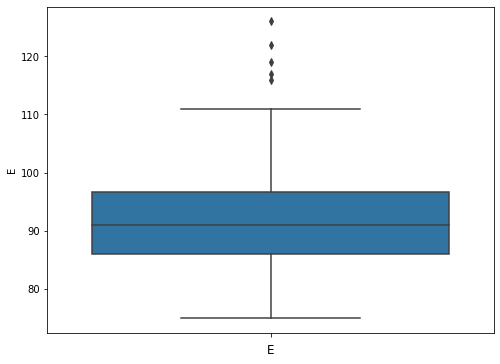

In [48]:
# Confirming the outliers

for i in baseball:
    plt.figure(figsize =(8,6))
    sns.boxplot(data = baseball, y = i);
    plt.xlabel(i, fontsize = 12)

there are not much outliers except in R and E column

In [51]:
## First we will remove the outliers from this attribute
## function to remove outlier

def remove_outliers(dataframe, column):
    
    Q3 = dataframe[column].quantile(0.75)
    Q1 = dataframe[column].quantile(0.25)
    
    IQR = Q3 - Q1
    
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
    df_no_outlier = dataframe[(dataframe[column] > lower ) & (dataframe[column] < upper)]

    return df_no_outlier

In [52]:
# Removing Outliers form Item_Outlet_Sales

baseball = remove_outliers(baseball, "R")
baseball = remove_outliers(baseball, "E")

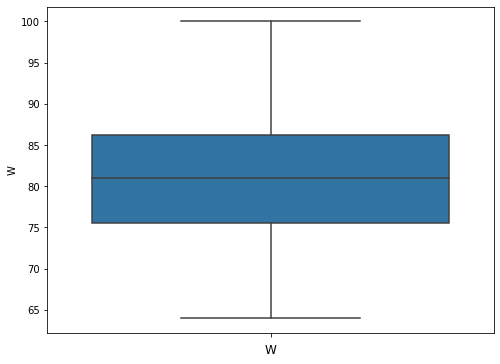

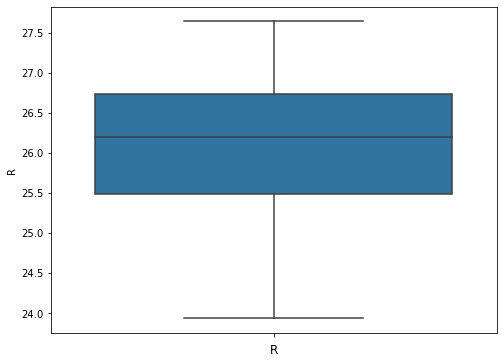

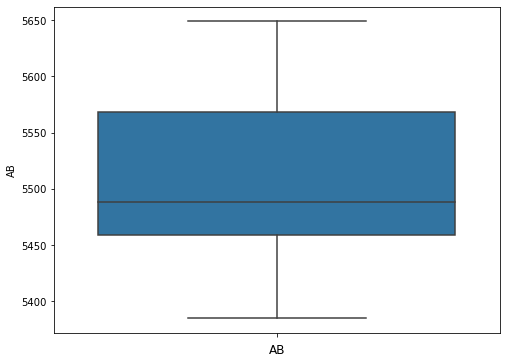

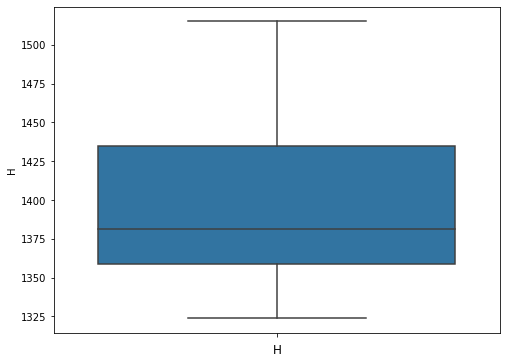

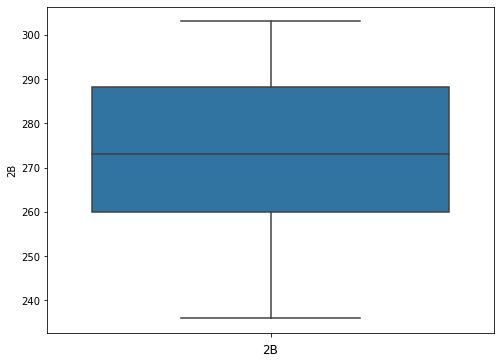

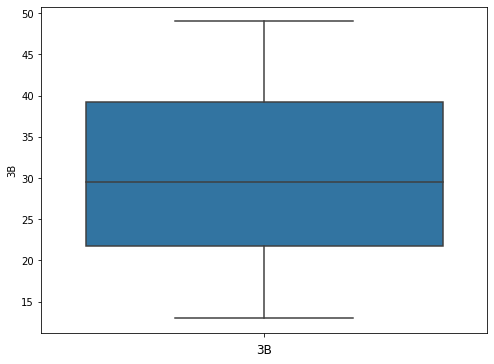

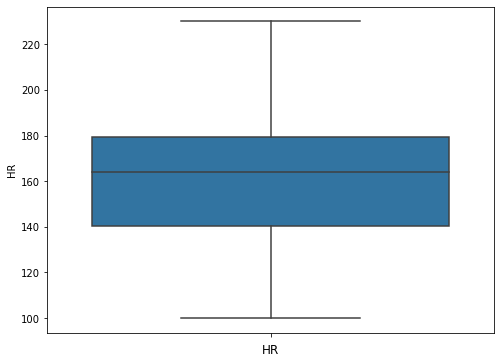

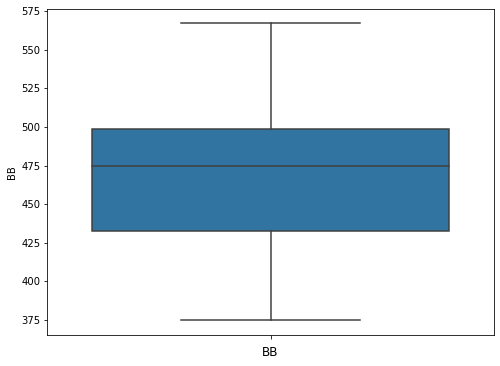

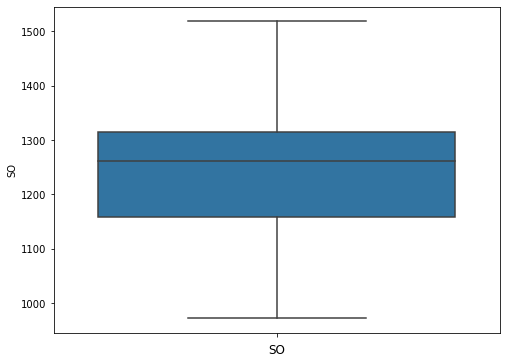

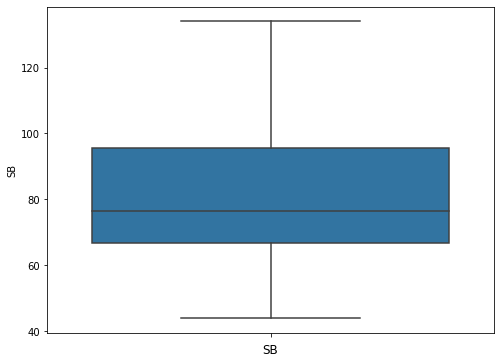

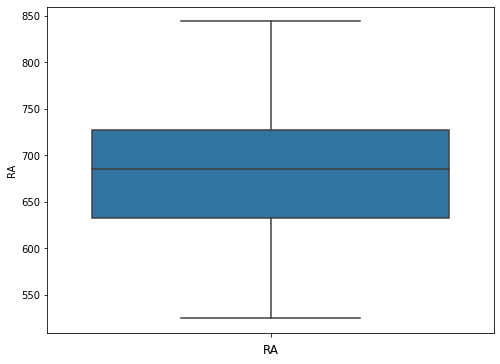

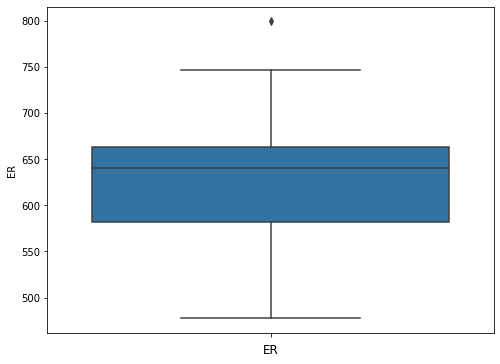

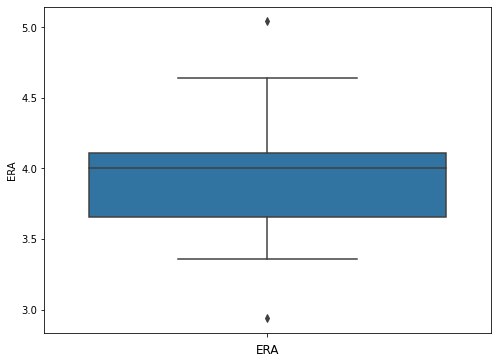

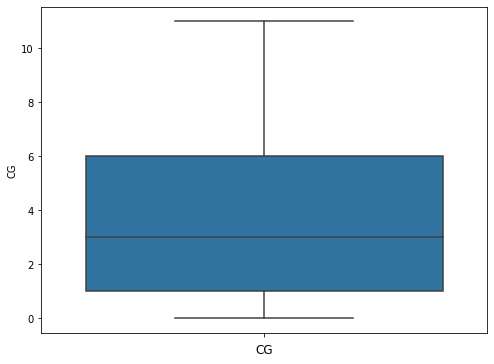

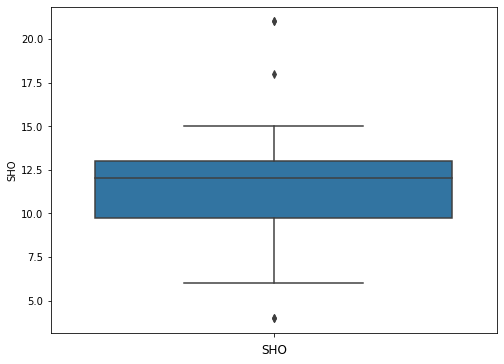

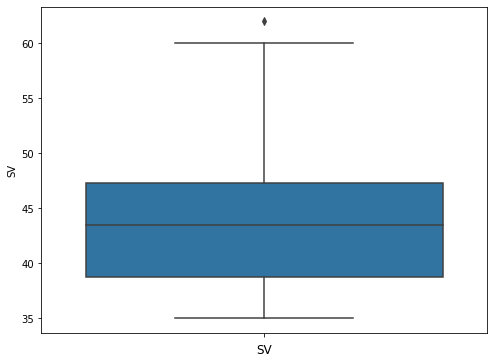

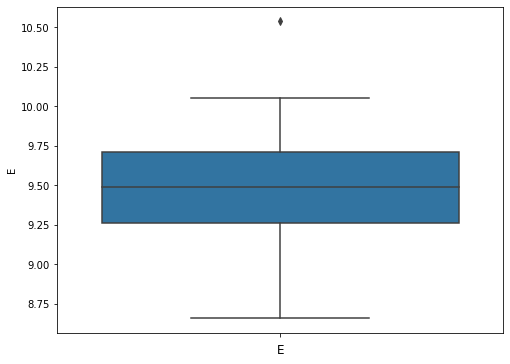

In [54]:
#Checking outliers after removing.

for i in baseball:
    plt.figure(figsize =(8,6))
    sns.boxplot(data = baseball, y = i);
    plt.xlabel(i, fontsize = 12)

We can see that there is significant reduction in outliers

In [49]:
## Function for fixing positive skewness
def sqrt_transformation(dataframe):
    return np.sqrt(dataframe)

In [50]:
# Treating Postive skewness

baseball['R'] = baseball["R"].map(sqrt_transformation)
baseball['E'] = baseball["E"].map(sqrt_transformation)

In [53]:
baseball.skew()

W      0.150095
R     -0.373389
AB     0.267092
H      0.824277
2B    -0.188987
3B     0.201691
HR     0.231168
BB     0.108890
SO    -0.192100
SB     0.635142
RA     0.175516
ER     0.200941
ERA    0.240317
CG     0.868504
SHO    0.483189
SV     0.985828
E      0.167245
dtype: float64

As we can see that data is now segnificantly showing less skewness.

#### Splitting the variable/ separating the dependent and independent variables

In [55]:
x=baseball.copy()
x.drop('W',axis=1,inplace=True)

y=baseball['W']

#### Scalling the data

In [56]:
#Scaling the data using standard scaler
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

xd=sc.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

# Building Machine Learning Models

In [68]:
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, train_test_split
import math

In [69]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19, 16), (5, 16), (19,), (5,))

### Linear Regression

In [70]:
lr = LinearRegression(normalize = True)
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [71]:
lr_predict = lr.predict(X_test)

In [72]:
yp = lr.predict(X_test)
print("R2 Score:", r2_score(y_test, lr_predict))
print("Mean Squarred Error:", mean_squared_error(y_test, lr_predict))
print("RMSE:", math.sqrt(mean_squared_error(y_test, lr_predict)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,lr_predict)))

R2 Score: 0.541549644954944
Mean Squarred Error: 30.917891944238573
RMSE: 5.56038595281286
Mean Absolute Error : 5.372954207356278


### XGBOOST REGRESSOR

In [73]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 1000, learning_rate = 0.05)
xgb.fit(X_train, y_train)

predict = xgb.predict(X_test)

In [74]:
print("R2 Score:", r2_score(y_test, predict))
print("Mean Squarred Error:", mean_squared_error(y_test, predict))
print("RMSE:", math.sqrt(mean_squared_error(y_test, predict)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,predict)))

R2 Score: 0.040747246253972524
Mean Squarred Error: 64.6920057126321
RMSE: 8.043134072774873
Mean Absolute Error : 7.232022094726562


### LASSO REGRSSOR

In [75]:
ls = Lasso(alpha = 0.01)
ls.fit(X_train, y_train)

Lasso(alpha=0.01)

In [76]:
lasso_pred = ls.predict(X_test)

In [77]:
print("R2 Score:", r2_score(y_test, lasso_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, lasso_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, lasso_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,lasso_pred)))

R2 Score: 0.6506692500625634
Mean Squarred Error: 23.558865775780724
RMSE: 4.85374760116147
Mean Absolute Error : 4.5033292062634


### LGBMRegressor

In [78]:
from lightgbm import LGBMRegressor

In [79]:
lgbm = LGBMRegressor()

In [80]:
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [81]:
lgbm_pred = lgbm.predict(X_test)

In [82]:
print("R2 Score:", r2_score(y_test, lgbm_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, lgbm_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, lgbm_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,lgbm_pred)))

R2 Score: -0.011318566128751373
Mean Squarred Error: 68.20332409972299
RMSE: 8.258530383774282
Mean Absolute Error : 6.494736842105263


### RandomForestRegressor

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
rf = RandomForestRegressor(n_estimators = 50, max_depth = 15, random_state = 47, min_samples_leaf = 10)

In [86]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=10, n_estimators=50,
                      random_state=47)

In [87]:
rf_pred = rf.predict(X_test)

In [88]:
print("R2 Score:", r2_score(y_test, rf_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, rf_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, rf_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,rf_pred)))

R2 Score: -0.01164821587589504
Mean Squarred Error: 68.22555567867036
RMSE: 8.259876250808505
Mean Absolute Error : 6.497263157894736


### DecisionTreeRegressor

In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [90]:
dt = DecisionTreeRegressor()

param_dist = {
            'max_depth': [2,5,10,50,25,30,40,],
}

dt_gs = GridSearchCV(dt, param_grid = param_dist, cv = 6)
dt_gs.fit(X_train, y_train)

dt_predict = dt_gs.predict(X_test)

In [91]:
print("R2 Score:", r2_score(y_test, dt_predict))
print("Mean Squarred Error:", mean_squared_error(y_test, dt_predict))
print("RMSE:", math.sqrt(mean_squared_error(y_test, dt_predict)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,dt_predict)))

R2 Score: -0.708185053380783
Mean Squarred Error: 115.2
RMSE: 10.73312629199899
Mean Absolute Error : 10.0


# Model Saving

In [92]:
model=Lasso(alpha = 0.01)
model.fit(X_train, y_train)
p=model.predict(X_test)
score=cross_val_score(model,x,y,cv=10)

In [93]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,y_test),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,y_test),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,y_test)),4))
print('R2 Score is',np.round(r2_score(p,y_test),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 4.5033
Mean Squared Error is 23.5589
Root Mean Squared Error is 4.8537
R2 Score is 73.1
Mean of cross validaton Score is -452.5742


# Saving Model

In [94]:
import joblib
joblib.dump(model,'Baseball.obj')

['Baseball.obj']